In [1]:
%config InlineBackend.figure_format = 'retina'

# Testing Enviornment

In [2]:
import pandas as pd
from pandas import DataFrame
import numpy as np

## Running tests

The following section unit-tests most of the code written for the proof of concept prototype.

In [3]:
%run ../test/test_algorithms.py

..............................
----------------------------------------------------------------------
Ran 30 tests in 0.122s

OK


In [4]:
%run ../test/test_dataloader.py

...............
----------------------------------------------------------------------
Ran 15 tests in 0.039s

OK


In [5]:
%run ../test/test_predictorsI.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


In [6]:
%run ../test/test_predictorsII.py

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [7]:
%run ../test/test_predictorsIII.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.007s

OK


In [8]:
%run ../test/test_activate.py

...
----------------------------------------------------------------------
Ran 3 tests in 0.005s

OK


## Running example of the system

In [9]:
%run ../consensus/algorithms.py

In [10]:
%run ../tools/dataloader.py

In [ ]:
test = DataLoader('aapl', '2009-01-01', '2010-02-10')

In [ ]:
prices = test.get_close()

In [ ]:
prices

In [ ]:
#prices = np.array(prices)
#len(prices)

In [ ]:
prices

In [ ]:
%run ../tools/predictorsI.py

In [ ]:
op0 = BasicUnivariatePredictor(prices, 24, 30)
op1 = BasicUnivariatePredictor(prices, 25, 7)
op2 = BasicUnivariatePredictor(prices, 25, 7)
op3 = BasicUnivariatePredictor(prices, 25, 7)

In [ ]:
op0.create_bilstm()

In [ ]:
op0.model_blueprint()

In [ ]:
op0.fit_model(150)

In [ ]:
op0.show_performance()

In [ ]:
op0.save_model()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op0.predict(oyea)
nice

In [ ]:
op1.create_lstm()

In [ ]:
op1.model_blueprint()

In [ ]:
op1.fit_model(10)

In [ ]:
op1.show_performance()

In [ ]:
nice = op1.predict(oyea)
nice

In [ ]:
op2.create_cnn()

In [ ]:
op2.model_blueprint()

In [ ]:
op2.fit_model(10)

In [ ]:
op2.show_performance()

In [ ]:
nice = op2.predict(oyea)
nice

In [ ]:
op3.create_mlp()

In [ ]:
op3.model_blueprint()

In [ ]:
op3.fit_model(100)

In [ ]:
op3.show_performance()

In [ ]:
oyea = prices[-26:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op3.predict(oyea)
nice

In [ ]:
%run ../tools/predictorsII.py

In [ ]:
oo = UnivariatePredictorII(prices, 7)

In [ ]:
oo.fit_neural_model(100,"D")

In [ ]:
oo.show_performance_neural()

In [ ]:
oo.predict_neural()

In [ ]:
oo.fit_prophet_model()

In [ ]:
oo.show_performance_prophet()

In [ ]:
oo.predict_prophet()

In [ ]:
%run ../tools/predictorsIII.py

In [ ]:
len(prices)

In [ ]:
op4 = HybridUnivariatePredictor(prices,2, 24, 7)

In [ ]:
op4.create_cnnlstm()

In [ ]:
op4.model_blueprint()

In [ ]:
op4.fit_model(10)

In [ ]:
op4.show_performance()

In [ ]:
oyea = prices[-25:-1]
#oyea = X[-1]
#oyea

In [ ]:
nice = op4.predict(oyea)
nice
#noice = pd.DataFrame(nice, columns=['yea'])
#noice = nice.reshape(20, 1)
#noice = pd.DataFrame(noice, columns=['yea'])

In [ ]:
nice.plot()

## Whole system test - I am alive v.3

In [ ]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [ ]:
training = DataLoader('aapl', '2009-01-01', '2010-05-01')

In [ ]:
training = training.get_close()

In [1]:
# adjusted close

In [3]:
%run ../tools/dataloader.py
%run ../system/activate.py

In [4]:
predict = DataLoader('BP', '2018-05-02', '2018-08-01')
predict = predict.calculate_returns_adj()

In [5]:
predict = predict[1:]

In [6]:
training = DataLoader('BP', '2015-01-01', '2018-01-01') # loading training DataFrame to train model on
training = training.calculate_returns_adj()

In [7]:
training = training[1:]

In [8]:
predict_req, real = data_prep(predict, 30, 5) # dividing data into predictor input and real data

Epoch 1/10
58/58 [==============================] - 1s 11ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.0728 - val_mean_squared_error: 0.0728
Epoch 2/10
58/58 [==============================] - 0s 5ms/step - loss: 0.1549 - mean_squared_error: 0.1549 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 3/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1546 - mean_squared_error: 0.1546 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1540 - mean_squared_error: 0.1540 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 5/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1522 - mean_squared_error: 0.1522 - val_loss: 0.0743 - val_mean_squared_error: 0.0743
Epoch 6/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1502 - mean_squared_error: 0.1502 - val_loss: 0.0745 - val_mean_squared_error: 0.0745
Epoch 7/10
58/58 [=====================

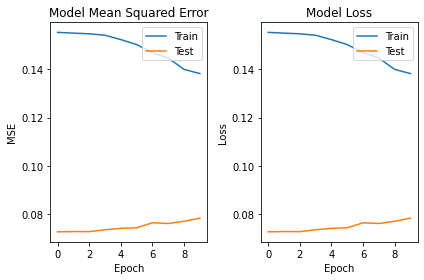

Epoch 1/10
58/58 [==============================] - 1s 26ms/step - loss: 0.1554 - mean_squared_error: 0.1554 - val_loss: 0.0726 - val_mean_squared_error: 0.0726
Epoch 2/10
58/58 [==============================] - 1s 18ms/step - loss: 0.1551 - mean_squared_error: 0.1551 - val_loss: 0.0729 - val_mean_squared_error: 0.0729
Epoch 3/10
58/58 [==============================] - 1s 17ms/step - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 4/10
58/58 [==============================] - 1s 18ms/step - loss: 0.1550 - mean_squared_error: 0.1550 - val_loss: 0.0730 - val_mean_squared_error: 0.0730
Epoch 5/10
58/58 [==============================] - 1s 18ms/step - loss: 0.1548 - mean_squared_error: 0.1548 - val_loss: 0.0732 - val_mean_squared_error: 0.0732
Epoch 6/10
58/58 [==============================] - 1s 18ms/step - loss: 0.1547 - mean_squared_error: 0.1547 - val_loss: 0.0733 - val_mean_squared_error: 0.0733
Epoch 7/10
58/58 [================

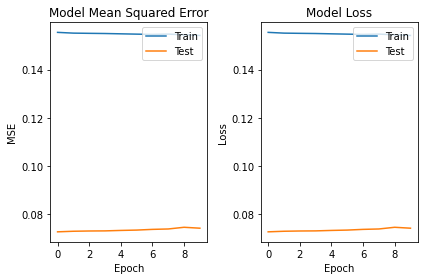

Epoch 1/10
58/58 [==============================] - 0s 5ms/step - loss: 0.1581 - mean_squared_error: 0.1581 - val_loss: 0.0737 - val_mean_squared_error: 0.0737
Epoch 2/10
58/58 [==============================] - 0s 3ms/step - loss: 0.1537 - mean_squared_error: 0.1537 - val_loss: 0.0739 - val_mean_squared_error: 0.0739
Epoch 3/10
58/58 [==============================] - 0s 3ms/step - loss: 0.1511 - mean_squared_error: 0.1511 - val_loss: 0.0756 - val_mean_squared_error: 0.0756
Epoch 4/10
58/58 [==============================] - 0s 3ms/step - loss: 0.1470 - mean_squared_error: 0.1470 - val_loss: 0.0780 - val_mean_squared_error: 0.0780
Epoch 5/10
58/58 [==============================] - 0s 2ms/step - loss: 0.1415 - mean_squared_error: 0.1415 - val_loss: 0.0783 - val_mean_squared_error: 0.0783
Epoch 6/10
58/58 [==============================] - 0s 3ms/step - loss: 0.1339 - mean_squared_error: 0.1339 - val_loss: 0.0814 - val_mean_squared_error: 0.0814
Epoch 7/10
58/58 [======================

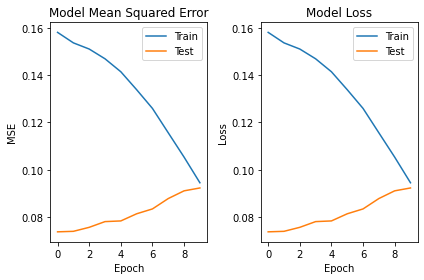

In [9]:
individual_predictors_forecasts = individual_predictors_template0(training, predict_req, 5, 10) # make forecast

In [10]:
consensus_forecasts = consensus(individual_predictors_forecasts, real) # create consolidation values

In [11]:
all_forecasts = combined_frame(individual_predictors_forecasts, consensus_forecasts, real)

In [17]:
all_forecasts

,Average,NoMemory,Memory,Focus,Anchor,Correcting,Correcting Memory,Real Value,CNN-LSTM,Bidirectional LSTM,CNN
Date,,,,,,,,,,,
2018-06-15,-0.074457,-0.074457,-0.074457,-0.074457,0.003717,-0.074457,-0.074457,-1.081829,-0.144272,0.007300,-0.086398
2018-06-18,-0.122000,-0.123342,-0.122671,-0.042743,0.030601,-2.179951,-1.150976,0.181679,-0.042743,0.013512,-0.336770
2018-06-19,-0.128651,-0.088635,-0.115713,0.004247,0.042164,0.137442,-0.588120,-0.165173,-0.038996,0.004247,-0.351203
2018-06-20,-0.098587,-0.095691,-0.092491,-0.080994,-0.019664,-0.226373,-0.390635,-0.322067,-0.080994,0.005972,-0.220740
2018-06-21,0.016933,0.022650,0.016119,0.061650,0.057610,0.003197,0.042032,-0.495495,-0.011494,0.000643,0.061650


In [12]:
prediction_error = absolute_error_analytics(individual_predictors_forecasts, consensus_forecasts, real) # create absolute error DataFrame

In [18]:
prediction_error

,CNN-LSTM absolute error,Bidirectional LSTM absolute error,CNN absolute error,Average absolute error,NoMemory absolute error,Memory absolute error,Focus absolute error,Anchor absolute error,Correcting absolute error,Correcting Memory absolute error,CNN-LSTM disagreement score,Bidirectional LSTM disagreement score,CNN disagreement score,System Disagreement
Date,,,,,,,,,,,,,,
2018-06-15,0.937557,1.089129,0.995431,1.007372,1.007372,1.007372,1.007372,1.085547,1.007372,1.007372,0.069815,0.081756,0.050524,0.067365
2018-06-18,0.224422,0.168167,0.518449,0.303679,0.305021,0.304350,0.224422,0.151077,2.361630,1.332655,0.116761,0.135512,0.214770,0.155681
2018-06-19,0.126176,0.169420,0.186031,0.036522,0.076538,0.049460,0.169420,0.207337,0.302615,0.422947,0.118483,0.132898,0.222552,0.157978
2018-06-20,0.241073,0.328039,0.101327,0.223480,0.226376,0.229576,0.241073,0.302404,0.095695,0.068567,0.075571,0.104559,0.122152,0.100761
2018-06-21,0.484000,0.496137,0.557145,0.512428,0.518145,0.511614,0.557145,0.553105,0.498691,0.537527,0.028427,0.024382,0.044717,0.032509


,Algorithms,MSE
0,Average,0.284176
1,NoMemory,0.286683
2,Memory,0.284866
3,Focus,0.292479
4,Anchor,0.328320
5,Correcting,1.388304
6,Correcting Memory,0.652658
7,CNN-LSTM,0.247534
8,Bidirectional LSTM,0.319389
9,CNN,0.322992


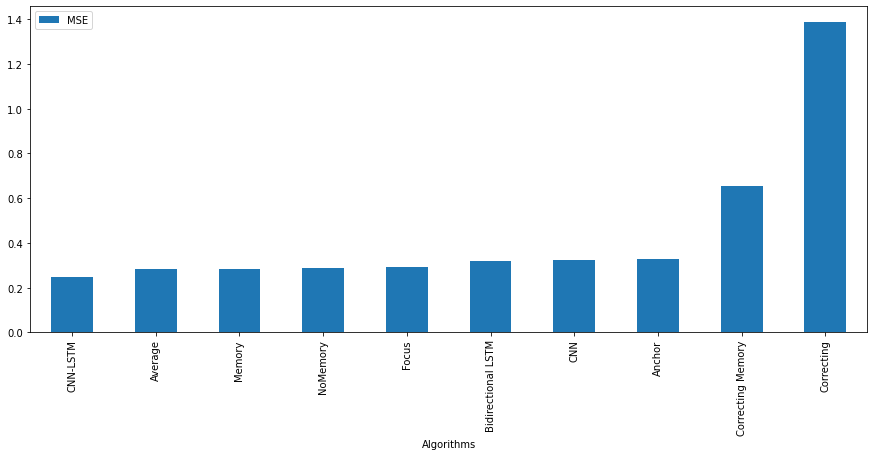

In [13]:
mse = mse_score(all_forecasts, True)
mse

In [14]:
mse_log = mse_log_score(all_forecasts, True)
mse_log

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

,Algorithms,MAE
0,Average,0.416696
1,NoMemory,0.426690
2,Memory,0.420474
3,Focus,0.439886
4,Anchor,0.459894
5,Correcting,0.853201
6,Correcting Memory,0.673814
7,CNN-LSTM,0.402646
8,Bidirectional LSTM,0.450178
9,CNN,0.471677


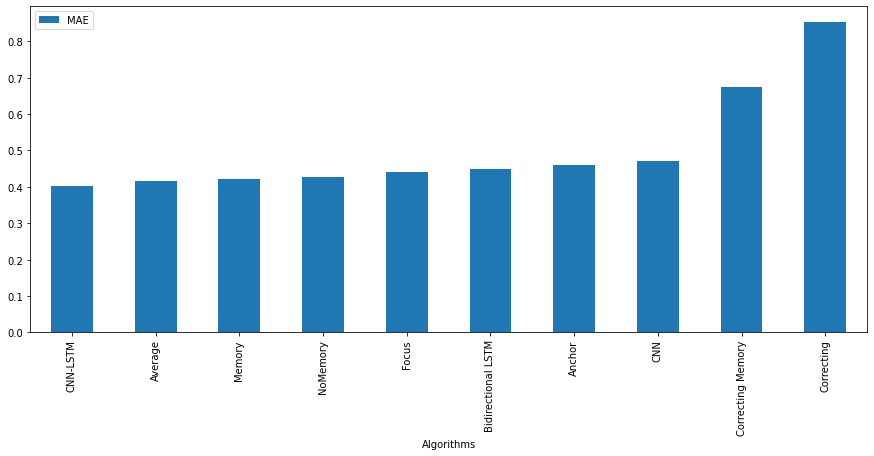

In [15]:
mae = mae_score(all_forecasts, True)
mae

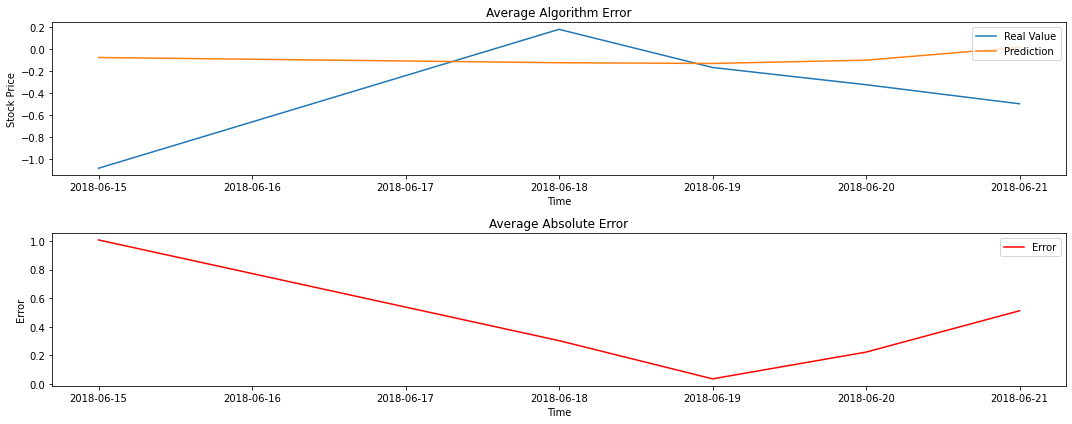

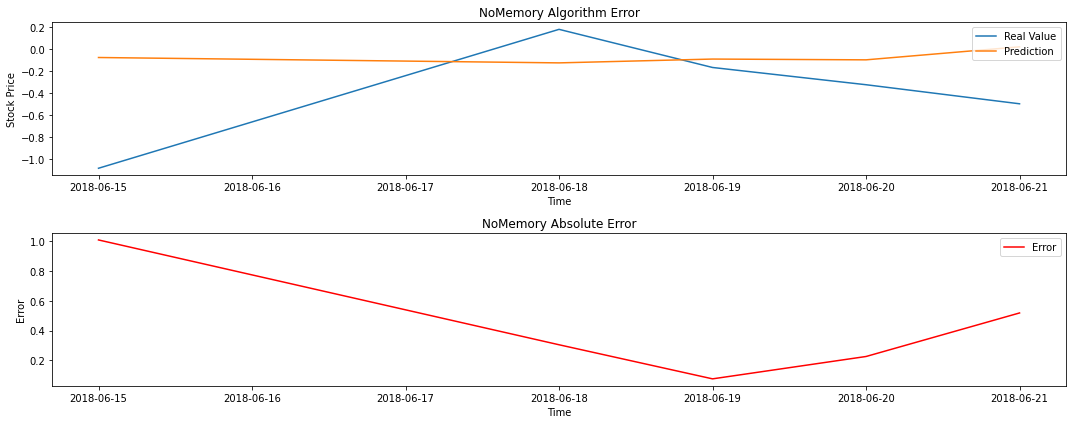

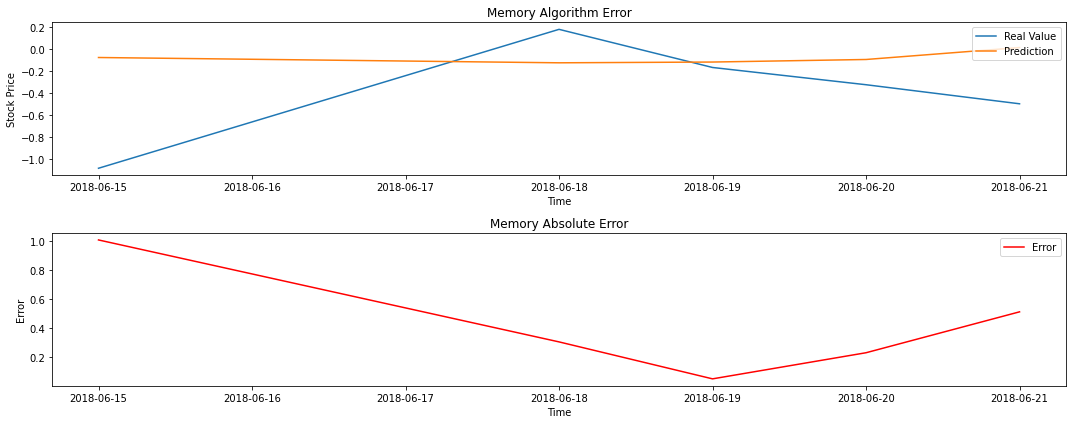

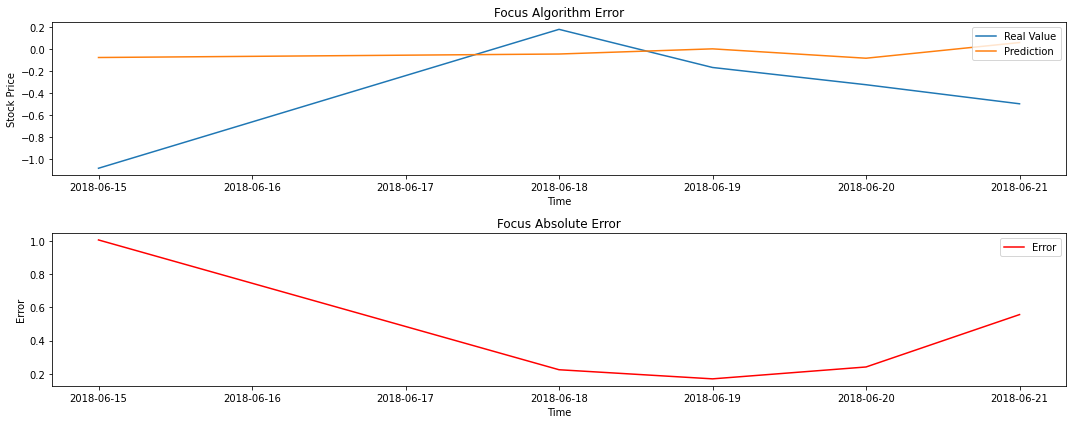

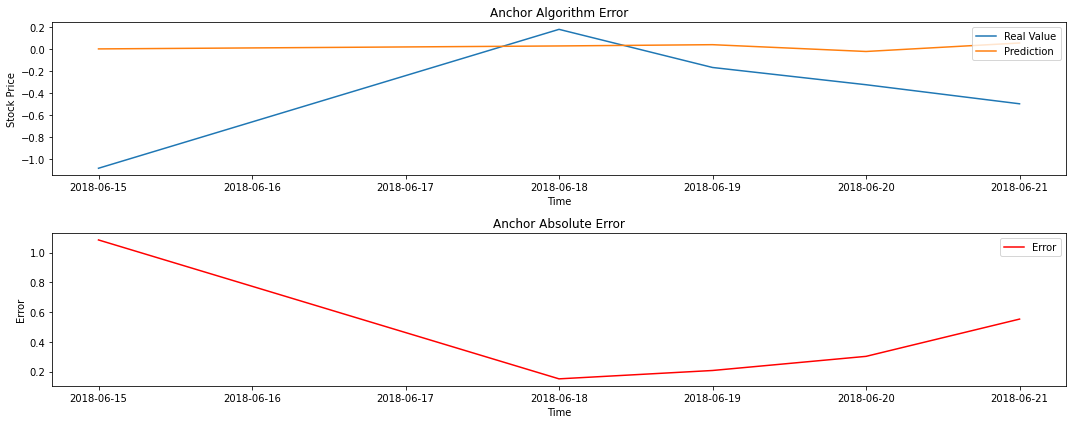

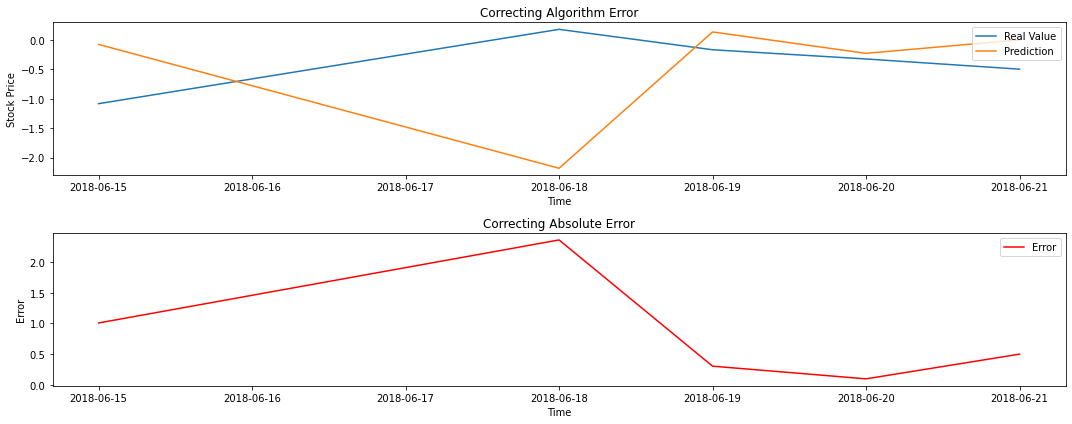

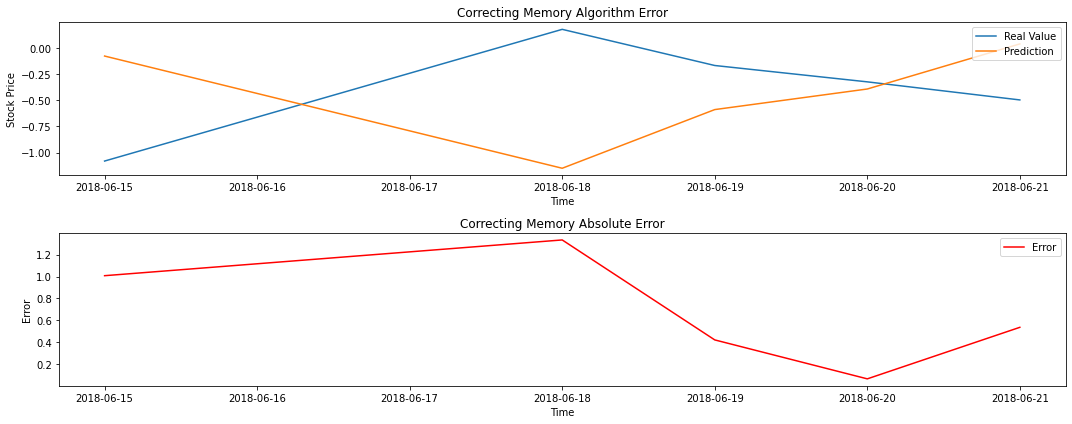

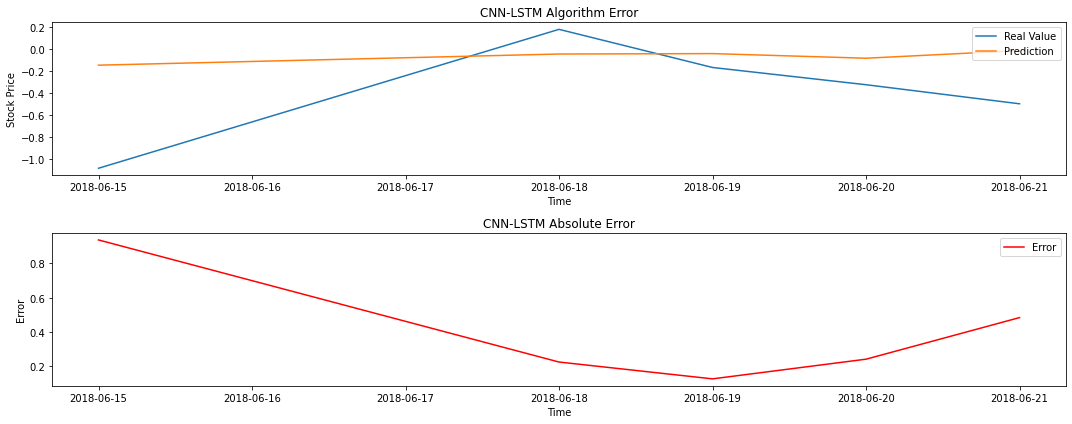

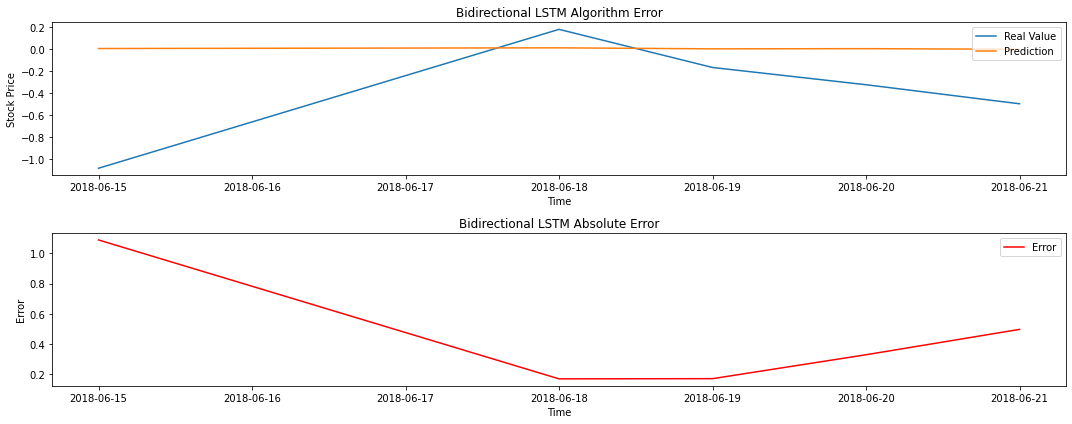

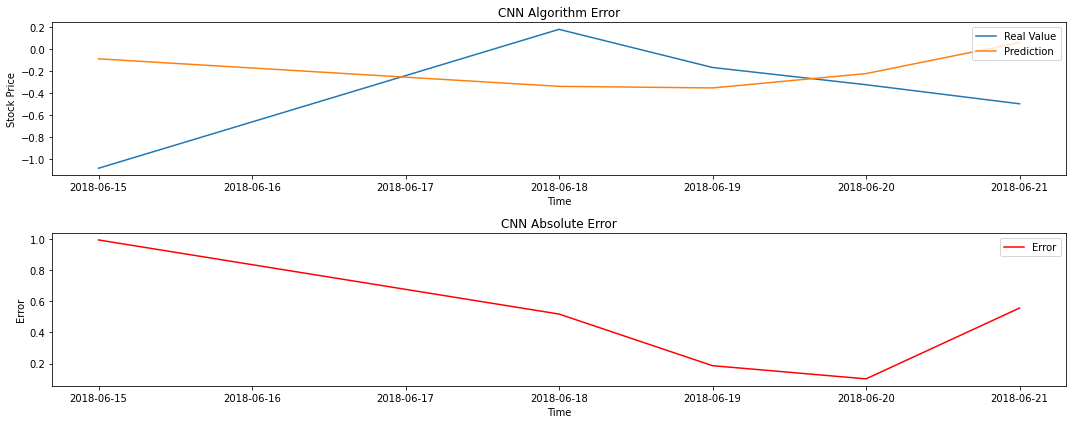

In [16]:
plot_performance(all_forecasts)